# **Assignment-2 Dwarakanath Chandra (8856840)**

In [1]:
# Installing the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## **Importing the heart disease dataset**

In [2]:
df = pd.read_csv(r'C:\Users\dwara\OneDrive\Desktop\AIALMA\CSCN8000-lab-submissions\students-submissions\8856840\heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### **Data Description**

In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are 918 rows (observations) and 12 columns (features in the data). Out of 12 features, HeartDisease column is the target column, which is categorical in nature and the remaining 11 columns are independent variables. Out of all independent variables, Sex, ChestPainType, RestingECG, ExcerciseAngina, ST_Slope are categorical features and the rest are numerical features.

### **Data Cleaning**

In [5]:
# Checking for Missing Values in the data

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in the heart dataset.

In [6]:
# Checking for and dropping duplicate values in the dataset

(df.drop_duplicates()).shape

(918, 12)

The same number of rows in the above output indicates that there are no duplicate values in the dataset.

### **Scaling the data using Z-score Standardization**

In [7]:
# Standardizing the numerical features using Z-score

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for column in df.columns:
    if((((df[column].dtype) == 'int64') | ((df[column].dtype) == 'float64')) & (column != 'HeartDisease')):
        df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))
    else:
        continue

print(df)

          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG   
0   -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal  \
1   -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2   -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3   -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4    0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   
..        ...  ..           ...        ...          ...        ...        ...   
913 -0.902775   M            TA  -1.210356     0.596393  -0.551341     Normal   
914  1.536902   M           ASY   0.627078    -0.053049   1.813758     Normal   
915  0.370100   M           ASY  -0.129513    -0.620168  -0.551341     Normal   
916  0.370100   F           ATA  -0.129513     0.340275  -0.551341        LVH   
917 -1.645286   M           NAP   0.302825    -0.217696  -0.551341     Normal   

        MaxHR ExerciseAngin

In [8]:
df.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### **Removing Outliers in the data using Z-score**

In [9]:
# Removing the outliers with Z-score of more the 3 standard deviation away from mean = 0

df_filtered = df.loc[
    (df['Age'].between(-3, 3)) &
    (df['RestingBP'].between(-3, 3)) &
    (df['Cholesterol'].between(-3, 3)) &
    (df['FastingBS'].between(-3, 3)) &
    (df['MaxHR'].between(-3, 3)) &
    (df['Oldpeak'].between(-3, 3))
]

df_filtered

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,M,TA,-1.210356,0.596393,-0.551341,Normal,-0.188999,N,0.293283,Flat,1
914,1.536902,M,ASY,0.627078,-0.053049,1.813758,Normal,0.164684,N,2.357094,Flat,1
915,0.370100,M,ASY,-0.129513,-0.620168,-0.551341,Normal,-0.857069,Y,0.293283,Flat,1
916,0.370100,F,ATA,-0.129513,0.340275,-0.551341,LVH,1.461525,N,-0.832432,Flat,1


Total 19 outliers removed from the dataset after applying Z-score outlier removal technique.

### **Data Preprocessing**

### **Converting the Text columns to Numberical using one-hot-encoding**

In [10]:
# List of columns to one-hot encode
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Perform one-hot encoding for the specified columns
encoded_df = pd.get_dummies(df_filtered, columns=columns_to_encode)

# Convert the One-hot-encoded boolean columns to integers 1 or 0
encoded_df.iloc[:, 6:] = encoded_df.iloc[:, 6:].astype(int)

# Print the DataFrame after one-hot encoding with True and False
encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [11]:
# Move the 'HeartDisease' column to the last position
encoded_df = encoded_df[[col for col in encoded_df.columns if col != 'HeartDisease'] + ['HeartDisease']]

# Print the DataFrame with 'HeartDisease' column as the last column
encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


### **Exploratory Data Analysis (EDA)**

#### **Understanding the class imbalance problem**

HeartDisease
1    492
0    407
Name: count, dtype: int64


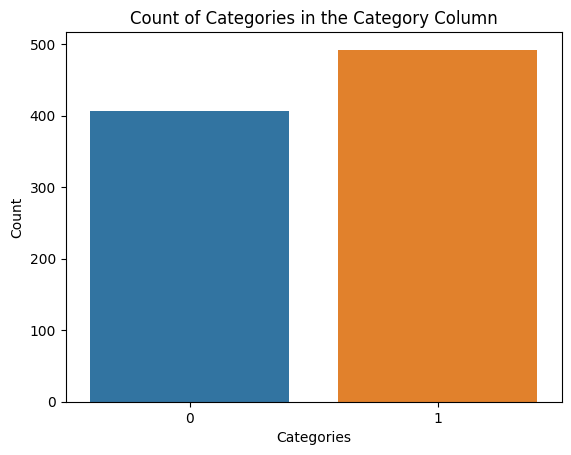

In [12]:
# Create the count plot
sns.countplot(data=encoded_df, x='HeartDisease')

# Get the counts for each category in the 'category_column'
value_counts = encoded_df['HeartDisease'].value_counts()
print(value_counts)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories in the Category Column')

plt.show()

There are 492 instances of patients with heart disease and 407 instances of patients without heart disease. Both classes (1 & 0) are distributed in a proportion of 55%:45%. Hence, as the number of both classes in the target are almost equally distributed, we can conclude that there is no significant class imbalance problem.

#### **Finding the distribution of male and female patients in the data**

Sex
M    710
F    189
Name: count, dtype: int64


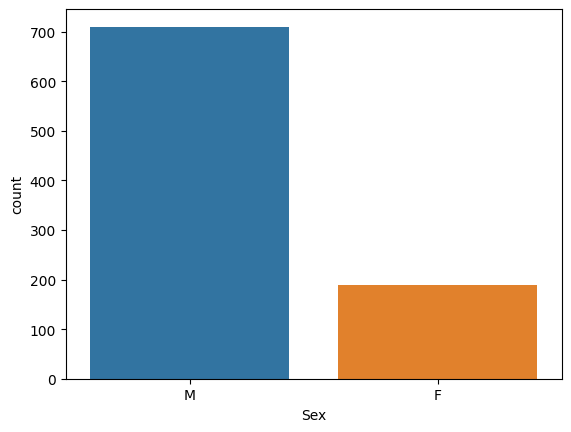

In [13]:
# Exploring the count of males and females in the data

value_counts = df_filtered.Sex.value_counts()
print(value_counts)
sns.countplot(data=df_filtered, x='Sex')
plt.show()

There are 710 males and 189 female patients in the dataset.

#### **Understanding the heart disease risk level in both male and females**

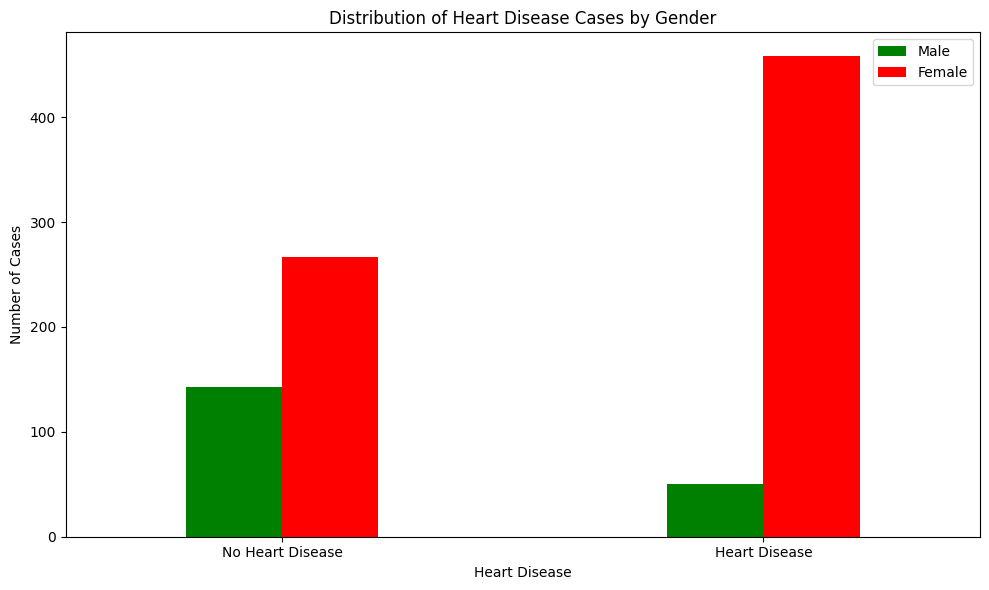

In [14]:
# Group the data by 'HeartDisease' and 'Sex', and calculate the counts
grouped = df.groupby(['HeartDisease', 'Sex']).size().unstack(fill_value=0)

# Create a side-by-side bar plot
ax = grouped.plot(kind='bar', figsize=(10, 6), color=['green', 'red'], width=0.4)
plt.title('Distribution of Heart Disease Cases by Gender')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Cases')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0)
plt.legend(['Male', 'Female'])
plt.tight_layout()
plt.show()

The above plot shows that, Men are more prone to heart diseases than Women.

#### **Observing the distribution of people suffering from various chest pains**

ChestPainType
ASY    483
NAP    200
ATA    171
TA      45
Name: count, dtype: int64


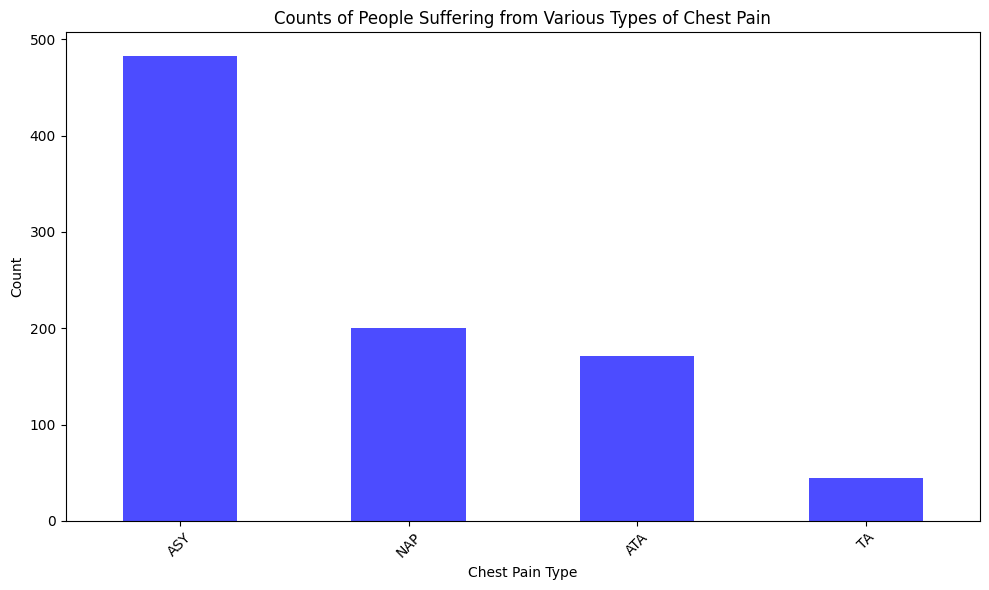

In [15]:
# Group the data by 'ChestPainType' and calculate the counts
grouped = df_filtered['ChestPainType'].value_counts()

print(grouped)

# Create a bar plot to visualize the counts of people with various types of chest pain
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Counts of People Suffering from Various Types of Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Majority of the people are suffering from ASY chest pain. Wherease TA type chest pain is rare in the data.

#### **Understanding the correlations**

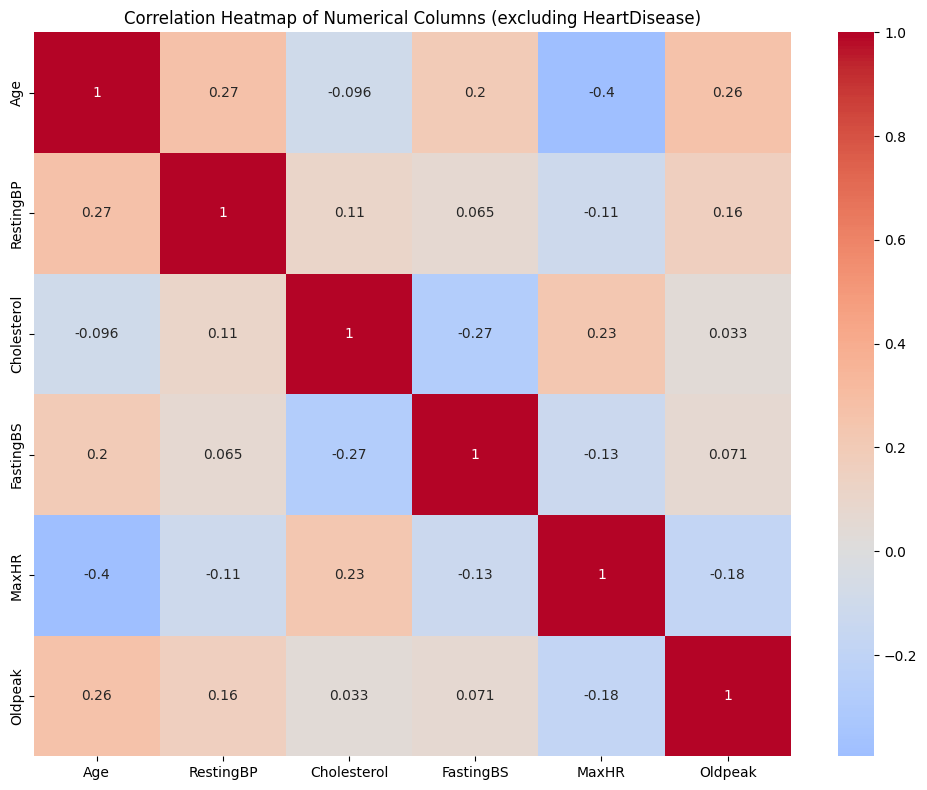

In [16]:
# Calculate the correlation matrix
correlation_matrix = encoded_df.iloc[:,:6].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Columns (excluding HeartDisease)')
plt.tight_layout()
plt.show()

We can see that there are no significant correlations between the independent variables in the data.

### **Classification Model Building**

### **Splitting the data into Feature Matrix and Target Vector**

In [17]:
X = encoded_df.iloc[:,:-1] # Defining the feature matric with all independent variables
y = encoded_df['HeartDisease'] # Defining the target vector of dependent variable

### **Splitting the data into train and test data**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=16)
print(y_train.value_counts())
print(y_test.value_counts())

HeartDisease
1    392
0    327
Name: count, dtype: int64
HeartDisease
1    100
0     80
Name: count, dtype: int64


### **Building Support Vector Machine Classification (Stand Alone) Model**

In [19]:
# Fitting the Standalone SVM model with training data

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
# Predicting the heart disease using the model on test data

y_pred_svm = svm_model.predict(X_test)

y_pred_svm

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [21]:
# Find the SVM standalone classifier model performance metrics without cross-validation

print("The accuracy score of the SVM standlone classifier is:", accuracy_score(y_test, y_pred_svm))

print("The confusion matrix of the SVM standlone classifier is:", confusion_matrix(y_test, y_pred_svm), sep = '\n')

print("The recall score of the SVM standlone classifier is:", recall_score(y_test, y_pred_svm))

print("The precision score of the SVM standlone classifier is:", precision_score(y_test, y_pred_svm))

print("The f1 score of the SVM standlone classifier is:", f1_score(y_test, y_pred_svm))

The accuracy score of the SVM standlone classifier is: 0.8833333333333333
The confusion matrix of the SVM standlone classifier is:
[[66 14]
 [ 7 93]]
The recall score of the SVM standlone classifier is: 0.93
The precision score of the SVM standlone classifier is: 0.8691588785046729
The f1 score of the SVM standlone classifier is: 0.8985507246376813


In [22]:
# Performing Cross validation on SVM standalone Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.85416667 0.84722222 0.88194444 0.84722222 0.84615385]
Mean accuracy: 0.8553418803418802


Cross-validation precision scores: [0.86151442 0.84722222 0.88256448 0.84754915 0.848779  ]
Mean precision: 0.8575258538138189
Cross-validation Recall Scores: [0.80593963 0.85345667 0.87062937 0.9009324  0.81923077]
Mean Recall Score: 0.850037768139034


### **Building Support Vector Machine Classification (Bagging) Model**

In [23]:
# Fitting the Bagging model with SVM base estimator
bagging_svm_model = BaggingClassifier(estimator=svm.SVC(kernel='linear'),
                                  n_estimators=500, max_samples=0.8,
                                  oob_score=True, 
                                  random_state=16)
bagging_svm_model.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(kernel='linear'), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=16)

In [24]:
# Predicting the heart disease using the bagging SVM on test data

y_pred_bag_svm = bagging_svm_model.predict(X_test)

y_pred_bag_svm

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [25]:
# Find the SVM bagging classifier model performance metrics without cross-validation

print("The accuracy score of the SVM bagging classifier is:", accuracy_score(y_test, y_pred_bag_svm))

print("The confusion matrix of the SVM bagging classifier is:", confusion_matrix(y_test, y_pred_bag_svm), sep = '\n')

print("The recall score of the SVM bagging classifier is:", recall_score(y_test, y_pred_bag_svm))

print("The precision score of the SVM bagging classifier is:", precision_score(y_test, y_pred_bag_svm))

print("The f1 score of the SVM bagging classifier is:", f1_score(y_test, y_pred_bag_svm))

The accuracy score of the SVM bagging classifier is: 0.8833333333333333
The confusion matrix of the SVM bagging classifier is:
[[66 14]
 [ 7 93]]
The recall score of the SVM bagging classifier is: 0.93
The precision score of the SVM bagging classifier is: 0.8691588785046729
The f1 score of the SVM bagging classifier is: 0.8985507246376813


In [26]:
# Performing Cross validation on Bagging SVM Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(bagging_svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(bagging_svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(bagging_svm_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.86111111 0.84722222 0.875      0.84027778 0.85314685]
Mean accuracy: 0.8553515928515928
Cross-validation precision scores: [0.86723692 0.84722222 0.87769542 0.84037423 0.85487631]
Mean precision: 0.8574810198139646
Cross-validation Recall Scores: [0.81363194 0.86114898 0.87820513 0.9009324  0.81923077]
Mean Recall Score: 0.8546298427311084


### **Building Decision Tree Classification (Stand Alone) Model**

In [27]:
# Fitting the Standalone Decision Tree model with training data

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Predicting the heart disease using the decision tree model on X_test

y_pred_tree = tree_model.predict(X_test)

y_pred_tree

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [29]:
# Find the Decision Tree classifier model performance metrics without cross-validation

print("The accuracy score of the standalone Decision Tree classifier is:", accuracy_score(y_test, y_pred_tree))

print("The confusion matrix of the standalone Decision Tree classifier is:", confusion_matrix(y_test, y_pred_tree), sep = '\n')

print("The recall score of the standalone Decision Tree classifier is:", recall_score(y_test, y_pred_tree))

print("The precision score of the standalone Decision Tree classifier is:", precision_score(y_test, y_pred_tree))

print("The f1 score of the standalone Decision Tree classifier is:", f1_score(y_test, y_pred_tree))

The accuracy score of the standalone Decision Tree classifier is: 0.8333333333333334
The confusion matrix of the standalone Decision Tree classifier is:
[[65 15]
 [15 85]]
The recall score of the standalone Decision Tree classifier is: 0.85
The precision score of the standalone Decision Tree classifier is: 0.85
The f1 score of the standalone Decision Tree classifier is: 0.85


In [30]:
# Performing Cross validation on Standalone Decision Tree Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(tree_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(tree_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.79166667 0.77083333 0.84722222 0.73611111 0.86713287]
Mean accuracy: 0.8025932400932401
Cross-validation precision scores: [0.80082856 0.72569444 0.84722222 0.74332968 0.84809543]
Mean precision: 0.7930340684946117
Cross-validation Recall Scores: [0.74488802 0.79649464 0.77913753 0.80011655 0.79102564]
Mean Recall Score: 0.7823324776489334


### **Building Decision Tree Classification (Bagging) Model**

In [31]:
# Fitting the training data into Bagging Decision Tree model

bag_tree_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=0.8, 
    oob_score=True,
    random_state=16
)

bag_tree_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=16)

In [32]:
# Predicting the heart disease using the bag_tree_model on test data

y_pred_bag_tree = bag_tree_model.predict(X_test)

y_pred_bag_tree

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [33]:
# Find the Bagging Decision Tree classifier model performance metrics without cross-validation

print("The accuracy score of the Bagging Decision Tree classifier is:", accuracy_score(y_test, y_pred_bag_tree))

print("The confusion matrix of the Bagging Decision Tree classifier is:", confusion_matrix(y_test, y_pred_bag_tree), sep = '\n')

print("The recall score of the Bagging Decision Tree classifier is:", recall_score(y_test, y_pred_bag_tree))

print("The precision score of the Bagging Decision Tree classifier is:", precision_score(y_test, y_pred_bag_tree))

print("The f1 score of the Bagging Decision Tree classifier is:", f1_score(y_test, y_pred_bag_tree))

The accuracy score of the Bagging Decision Tree classifier is: 0.8944444444444445
The confusion matrix of the Bagging Decision Tree classifier is:
[[67 13]
 [ 6 94]]
The recall score of the Bagging Decision Tree classifier is: 0.94
The precision score of the Bagging Decision Tree classifier is: 0.8785046728971962
The f1 score of the Bagging Decision Tree classifier is: 0.9082125603864735


In [34]:
# Performing Cross validation on Bagging Decision Tree Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(bag_tree_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(bag_tree_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(bag_tree_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.85416667 0.82638889 0.89583333 0.82638889 0.86013986]
Mean accuracy: 0.8525835275835275
Cross-validation precision scores: [0.85678781 0.82624959 0.89817387 0.82705652 0.86267066]
Mean precision: 0.8541876906086154
Cross-validation Recall Scores: [0.80457644 0.83310613 0.87587413 0.86538462 0.83076923]
Mean Recall Score: 0.841942108524387


### **Consolidated Performance Metrics Summary of all models**

#### **The Performance Metrics of Standalone SVM classification model are:**
* Cross-validation accuracy scores: [0.85416667 0.84722222 0.88194444 0.84722222 0.84615385]
* Mean accuracy: 0.8553418803418802
* Cross-validation precision scores: [0.86151442 0.84722222 0.88256448 0.84754915 0.848779  ]
* Mean precision: 0.8575258538138189
* Cross-validation Recall Scores: [0.80593963 0.85345667 0.87062937 0.9009324  0.81923077]
* Mean Recall Score: 0.850037768139034 <br>

#### **The performance metrics of bagging SVM classification model are:**
* Cross-validation accuracy scores: [0.86111111 0.84722222 0.875      0.84027778 0.85314685]
* Mean accuracy: 0.8553515928515928
* Cross-validation precision scores: [0.86723692 0.84722222 0.87769542 0.84037423 0.85487631]
* Mean precision: 0.8574810198139646
* Cross-validation Recall Scores: [0.81363194 0.86114898 0.87820513 0.9009324  0.81923077]
* Mean Recall Score: 0.8546298427311084

#### **The Performance Metrics of Standalone Decision Tree classification model are:**
* Cross-validation accuracy scores: [0.75       0.76388889 0.84027778 0.75       0.83916084]
* Mean accuracy: 0.7886655011655012
* Cross-validation precision scores: [0.75154321 0.75       0.83333333 0.72915862 0.85908031]
* Mean precision: 0.7846230959488535
* Cross-validation Recall Scores: [0.74216164 0.7684518  0.79428904 0.80652681 0.78461538]
* Mean Recall Score: 0.7792089345253903

#### **The Performance Metrics of Bagging Decision Tree classification model are:**
* Cross-validation accuracy scores: [0.85416667 0.82638889 0.89583333 0.82638889 0.86013986]
* Mean accuracy: 0.8525835275835275
* Cross-validation precision scores: [0.85678781 0.82624959 0.89817387 0.82705652 0.86267066]
* Mean precision: 0.8541876906086154
* Cross-validation Recall Scores: [0.80457644 0.83310613 0.87587413 0.86538462 0.83076923]
* Mean Recall Score: 0.841942108524387

### **Observations**

##### **From the above consolidated performance metrics, we can clearly see that:**
##### **For SVM Standalone model and SVM Bagging model, the performance parameters are not varying significantly. Whereas there is a significant difference in the performance parameters of standalone decision tree and bagging decision tree models.**

##### **When all 4 models considered, the bagging SVM model with SVM as base estimator showing good performance in all performance metrics such as accuracy, precision, and recall. Hence, we can conclude that SVM Bagging Classification model is performing better than all other models in predicting the heart disease.**

##### **Reason for SVM Bagging Model's Performance: SVM is a powerful classifier for binary classification problems like heart disease prediction. The standalone SVM model may achieve high accuracy but might suffer from overfitting, especially with a small dataset.In such cases Bagging technique (ensemble method) helps to improve the generalization of the model by reducing variance and stabilizing the predictions.**

##### **The Bagging model, which uses multiple SVM models(ensemble), often outperforms the standalone SVM in terms of accuracy and robustness, especially on smaller datasets or datasets with high variance. However, the performance of the models may vary depending on the dataset, kernel, and other hyperparameters used. It's essential to tune the hyperparameters and use techniques like cross-validation for more reliable performance evaluation. Hence, it can be observed that in the above models, the performance parameters are almost equal for different models.**